In [1]:
 #Cross-contour transport

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import numpy as np

session = cc.database.create_session()
experiment = '01deg_jra55v13_ryf9091'
lat_range =  slice(-79, -56)

In [7]:
yt_ocean = cc.querying.getvar(experiment, 'yt_ocean', session, n=1)
yt_ocean = yt_ocean.sel(yt_ocean = lat_range)

xt_ocean = cc.querying.getvar(experiment, 'xt_ocean', session, n=1)

yu_ocean = cc.querying.getvar(experiment, 'yu_ocean', session, n=1)
yu_ocean = yu_ocean.sel(yu_ocean = lat_range)

xu_ocean = cc.querying.getvar(experiment, 'xu_ocean', session, n=1)

In [4]:
if len(yt_ocean) != len(yu_ocean):
    print('help! y different size')

if yt_ocean.min('yt_ocean')> yu_ocean.min('yu_ocean'):
    print('help! wrong order')

if len(xt_ocean) != len(xu_ocean):
    print('help! x different size')

if xt_ocean.min('xt_ocean')> xu_ocean.min('xu_ocean'):
    print('help! x wrong order')

In [8]:
start_time = '2170-01-01'
end_time = '2170-12-31'
time_slice = slice(start_time, end_time)
bath = cc.querying.getvar(experiment,'ht', session, n=-1)


bath_mean = bath.sel(yt_ocean = lat_range)

bath_mean
contour_depth = 1000

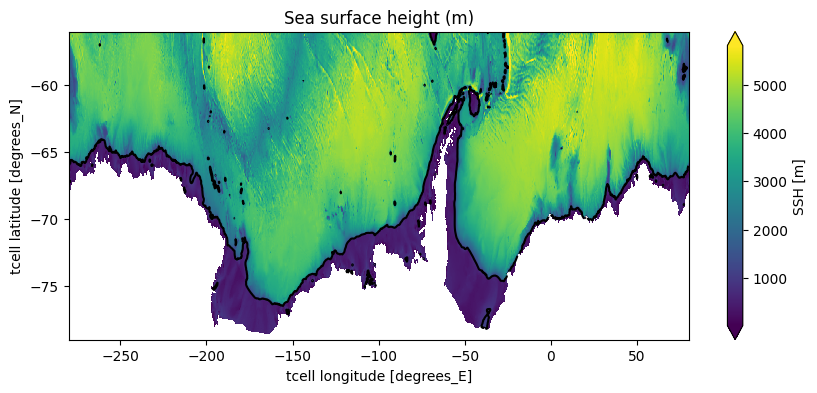

In [9]:
fig = plt.figure(figsize = (10, 4))

bath_mean.plot(extend='both', cbar_kwargs={'label': "SSH [m]"})
bath_mean.plot.contour(levels = [contour_depth], colors = 'k', linestyles = '-')
plt.title('Sea surface height (m)');